# An illustration of the MARBLE method on the Van der Pol oscillator

In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

import MARBLE
from MARBLE import plotting, dynamics, geometry

np.random.seed(42)

/opt/anaconda3/envs/MARBLE/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


First create some plots to illustrate the limit cycle in two regimes ($\mu<0$ and $\mu>0)$

/opt/anaconda3/envs/MARBLE/lib/python3.9/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


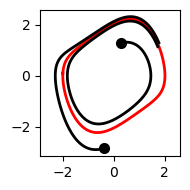

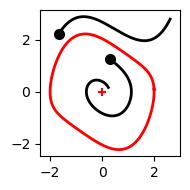

In [2]:
# simulate some long trajectories to plot attractor
t_long = np.arange(0, 100, 0.01)
area = [[-3, -3],[3, 3]]

mus_long = [0.5, 0.5, 0.5, -0.5, -0.5, -0.5, -0.5]
X0 = dynamics.initial_conditions(1, len(mus_long), area)
p_long, v_long = [], []
for X0, m in zip(X0, mus_long):
    p, v = dynamics.simulate_vanderpol(m, X0, t_long, keep_v=True)
    p_long.append(p[0])
    v_long.append(v[0])

plt.figure(figsize=(2, 2))
plt.plot(p_long[0][-640:, 0], p_long[0][-640:, 1], '-', c='r', lw=2)
plt.scatter(p_long[0][0, 0], p_long[0][0, 1], c='k', lw=2)
plt.plot(p_long[0][:700, 0], p_long[0][:700, 1], '-', c='k', lw=2)
plt.scatter(p_long[2][0, 0], p_long[2][0, 1], c='k', lw=2)
plt.plot(p_long[2][:400, 0], p_long[2][:400, 1], '-', c='k', lw=2)


plt.axis('equal')
plt.tight_layout()

#plt.savefig('traj_stable.pdf')


plt.figure(figsize=(2, 2))
plt.scatter(0, 0, c='r', marker='+')
plt.plot(-p_long[0][-640:, 0], p_long[0][-640:, 1], '-', c='r', lw=2)
plt.scatter(p_long[3][0, 0], p_long[3][0, 1], c='k', lw=2)
plt.plot(p_long[3][:700, 0], p_long[3][:700, 1], '-', c='k', lw=2)
plt.scatter(p_long[5][0, 0], p_long[5][0, 1], c='k', lw=2)
plt.plot(p_long[5][:180, 0], p_long[5][:180, 1], '-', c='k', lw=2)


plt.axis('equal')
plt.tight_layout()

#plt.savefig('traj_unstable.pdf')

Generate phase portraits over a parabola while varying $\mu$

In [3]:
def get_pos_vel(mus, alpha=0.05):
    X0_range = dynamics.initial_conditions(n, len(mus), area)

    pos, vel = [], []
    for X0, m in zip(X0_range, mus):
        p, v = dynamics.simulate_vanderpol(m, X0, t)
        pos.append(np.vstack(p))
        vel.append(np.vstack(v))

    pos, vel = dynamics.embed_parabola(pos, vel, alpha=alpha)
    return pos, vel

# Run MARBLE in geometry-agnostic mode on $\mu\in [-1,1]$

In [4]:
n_mus = 40
t = np.arange(0, 3, 0.5)
n = 100
area = [[-3, -3],[3, 3]]

mus = np.linspace(-1.0, 1.0, n_mus)
pos, vel = get_pos_vel(mus)

In [5]:
data = MARBLE.construct_dataset(anchor=pos, vector=vel, spacing=0.03)


---- Embedding dimension: 3
---- Signal dimension: 3
---- Computing kernels ... 

In [10]:
params = {'epochs': 50, #optimisation epochs
       'hidden_channels': 32, #number of internal dimensions in MLP
       'out_channels': 5,
       'inner_product_features': False,
       'diffusion': False
      }

model = MARBLE.net(data, params=params)
model.fit(data, outdir='model_large')


---- Settings: 

epochs : 50
hidden_channels : [32]
out_channels : 5
inner_product_features : False
diffusion : False
batch_size : 64
lr : 0.01
momentum : 0.9
order : 2
frac_sampled_nb : -1
include_positions : False
include_self : True
dropout : 0.0
vec_norm : False
bias : True
batch_norm : batch_norm
emb_norm : False
seed : 0
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  39
---- Total number of parameters:  1510

Using device cpu

---- Training network ...

---- Timestamp: 20240411-075314

Epoch: 0, Training loss: 1.124386, Validation loss: 1.0902, lr: 0.0100 *
Epoch: 1, Training loss: 1.066754, Validation loss: 1.1549, lr: 0.0100
Epoch: 2, Training loss: 1.065728, Validation loss: 1.1153, lr: 0.0100
Epoch: 3, Training loss: 1.036062, Validation loss: 1.0091, lr: 0.0100 *
Epoch: 4, Training loss: 1.041593, Validation loss: 1.0567, lr: 0.0100
Epoch: 5, Training loss: 1.015976, Validation loss: 1.0655, lr: 0.0100
Epoch: 6, Training loss: 1.0

# Show results: embedding, distance matrix and its MDS embedding 

/opt/anaconda3/envs/MARBLE/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Performed umap embedding on embedded results.
Performed MDS embedding on embedded results.
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need to pass a data object to plot trajectories!
You need

<Axes: >

<Figure size 400x400 with 0 Axes>

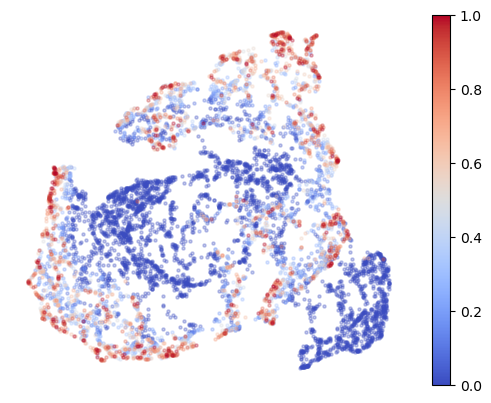

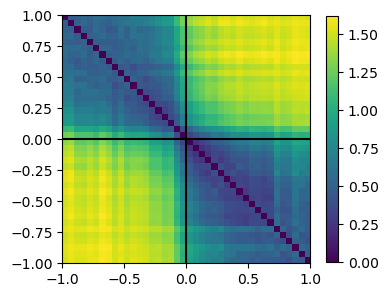

<Figure size 400x400 with 0 Axes>

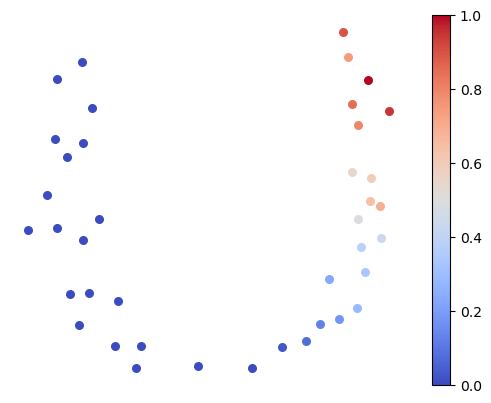

In [11]:
data = model.transform(data)
data = MARBLE.distribution_distances(data)
data = MARBLE.embed_in_2D(data)

plt.figure(figsize=(4, 4))
plotting.embedding(data, mus[data.y.numpy().astype(int)])

plt.figure(figsize=(4, 4))
im = plt.imshow(data.dist, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.colorbar(im, shrink=0.8)

emb_MDS, _ = geometry.embed(data.dist, embed_typ='MDS')

plt.figure(figsize=(4, 4))
plotting.embedding(emb_MDS, mus, s=30, alpha=1)

# Now repeat for a smaller range $\mu\in[-0.1,0.1]$

In [8]:
mus = np.linspace(-0.1, 0.1, n_mus)
pos, vel = get_pos_vel(mus)

data = MARBLE.construct_dataset(anchor=pos, vector=vel, k=20, spacing=0.03)
model = MARBLE.net(data, params=params)
model.fit(data, outdir='model_zoom')

/Users/arnaudon/base/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


---- Embedding dimension: 3
---- Signal dimension: 3


---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 

---- Settings: 

epochs : 50
order : 2
hidden_channels : 32
out_channels : 5
inner_product_features : True
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  13
---- Total number of parameters:  731

---- Training network ...

Epoch: 0, Training loss: 1.309698, Validation loss: 1.2128, lr: 0.0100 *
Epoch: 1, Training loss: 1.122567, Validation loss: 1.1218, lr: 0.0100 *
Epoch: 2, Training loss: 1.087854, Validation loss: 1.0621, lr: 0.0100 *
Epoch: 3, Training loss: 1.069521, Validation loss: 1.1066, lr: 0.0100
Epoch: 4, Training loss: 1.058513, Validation loss: 1.0869, lr: 0.0100
Epoch: 5, Training loss: 1.06579

Show results: embedding, distance matrix and its MDS embedding 

Performed umap embedding on embedded results.
[7.81512278e-01 1.60675295e-01 2.19012697e-02 5.19371448e-03
 2.78597422e-03 2.15143149e-03 1.73000459e-03 1.61541572e-03
 1.45093906e-03 1.33295136e-03 1.25398340e-03 1.18964213e-03
 1.09815260e-03 1.04377891e-03 9.75453147e-04 9.22878174e-04
 8.68403382e-04 8.10130618e-04 7.81357332e-04 7.45713509e-04]
Performed PCA embedding on embedded results.


<Figure size 400x400 with 0 Axes>

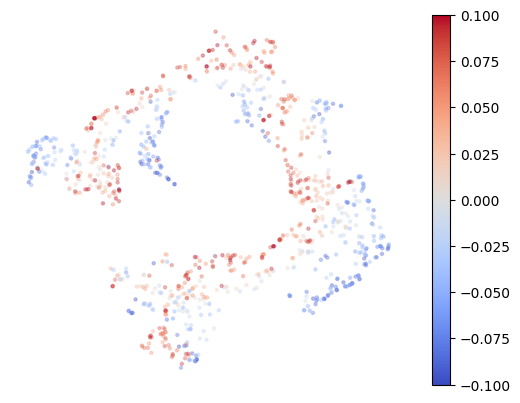

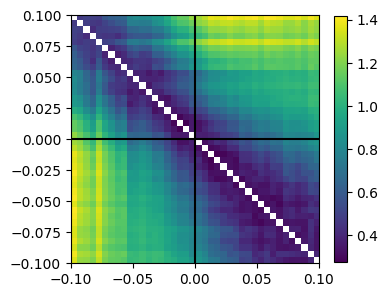

<Figure size 400x400 with 0 Axes>

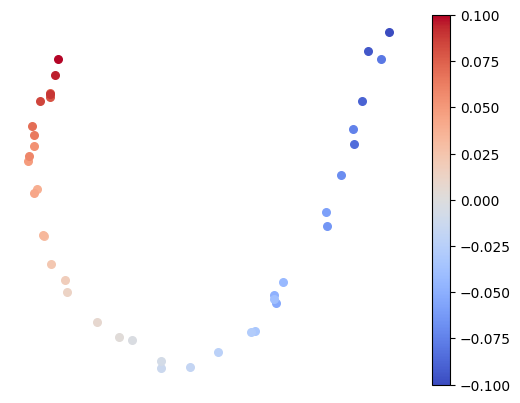

In [9]:
data = model.transform(data)
data = MARBLE.distribution_distances(data)
data = MARBLE.embed_in_2D(data)

plt.figure(figsize=(4, 4))
plotting.embedding(data, mus[data.y.numpy().astype(int)])

plt.figure(figsize=(4, 4))
im = plt.imshow(data.dist, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.colorbar(im, shrink=0.8)

emb_MDS, _ = geometry.embed(data.dist, embed_typ='MDS')

plt.figure(figsize=(4, 4))
plotting.embedding(emb_MDS, mus, s=30, alpha=1)

# Repeat for changing parabola curvature

In [13]:
from scipy.stats import special_ortho_group
def get_pos_vel_noise(mus, alpha=0.05):
    X0_range = dynamics.initial_conditions(n, len(mus), area)

    pos, vel = [], []
    for X0, m in zip(X0_range, mus):
        p, v = dynamics.simulate_vanderpol(m, X0, t)
        a = np.random.uniform(-alpha, alpha)
        p, v = dynamics.embed_parabola(p, v, alpha=alpha)
        p = np.vstack(p)
        shift = np.random.uniform(-2, 2, 3)
        pos.append(p+shift)
        v = np.vstack(v)
        vel.append(v)
   
    return pos, vel

In [11]:
mus = np.linspace(-0.1, 0.1, n_mus)
pos, vel = get_pos_vel_noise(mus, alpha=0.2)

data = MARBLE.construct_dataset(anchor=pos, vector=vel, k=20, spacing=0.03)

params['inner_product_features'] = True
model = MARBLE.net(data, params=params)
model.fit(data, outdir='model_noise_inner')

/Users/arnaudon/base/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


---- Embedding dimension: 3
---- Signal dimension: 3


---- Computing kernels ... Done 
---- Computing eigendecomposition ... Done 

---- Settings: 

epochs : 50
order : 2
hidden_channels : 32
out_channels : 5
inner_product_features : True
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  13
---- Total number of parameters:  731

---- Training network ...

Epoch: 0, Training loss: 1.270293, Validation loss: 1.1471, lr: 0.0100 *
Epoch: 1, Training loss: 1.101365, Validation loss: 1.1040, lr: 0.0100 *
Epoch: 2, Training loss: 1.090652, Validation loss: 1.0912, lr: 0.0100 *
Epoch: 3, Training loss: 1.087600, Validation loss: 1.1217, lr: 0.0100
Epoch: 4, Training loss: 1.070062, Validation loss: 1.1001, lr: 0.0100
Epoch: 5, Training loss: 1.05992

Show results: embedding, distance matrix and its MDS embedding 

Performed umap embedding on embedded results.
[7.95607375e-01 1.44411457e-01 2.30742858e-02 5.08080093e-03
 2.90027592e-03 2.35954896e-03 1.94219041e-03 1.66585442e-03
 1.59532236e-03 1.47309818e-03 1.29247175e-03 1.20334681e-03
 1.06882474e-03 1.05954940e-03 1.01979882e-03 9.58909345e-04
 9.34311776e-04 8.44336650e-04 7.83924137e-04 7.78109191e-04]
Performed PCA embedding on embedded results.


<Figure size 400x400 with 0 Axes>

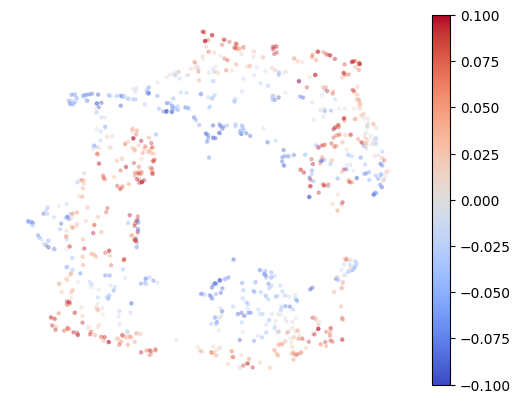

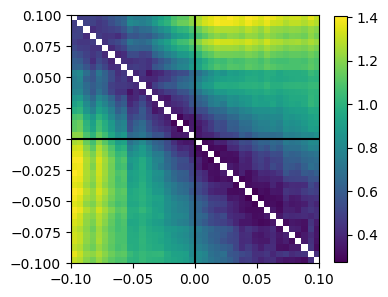

<Figure size 400x400 with 0 Axes>

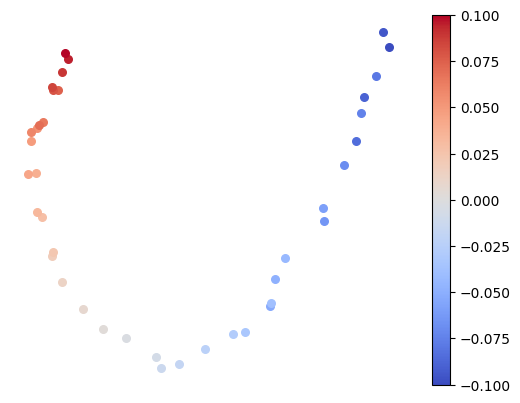

In [12]:
data = model.transform(data)
data = MARBLE.distribution_distances(data)
data = MARBLE.embed_in_2D(data)

plt.figure(figsize=(4, 4))
plotting.embedding(data, mus[data.y.numpy().astype(int)])

plt.figure(figsize=(4, 4))
im = plt.imshow(data.dist, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.colorbar(im, shrink=0.8)

emb_MDS, _ = geometry.embed(data.dist, embed_typ='MDS')

plt.figure(figsize=(4, 4))
plotting.embedding(emb_MDS, mus, s=30, alpha=1)

# Finally changing parabola curvature in geometry-aware mode

In [13]:
params['inner_product_features'] = False
model = MARBLE.net(data, params=params)
model.fit(data, outdir='model_noise_no_inner')

{'epochs': 50, 'order': 2, 'hidden_channels': 32, 'out_channels': 5, 'inner_product_features': False}

---- Settings: 

epochs : 50
order : 2
hidden_channels : 32
out_channels : 5
inner_product_features : False
batch_size : 64
lr : 0.01
momentum : 0.9
diffusion : False
include_positions : False
frac_sampled_nb : -1
dropout : 0.0
n_lin_layers : 2
bias : True
vec_norm : False
batch_norm : None
seed : 0
processes : 1
dim_signal : 3
dim_emb : 3
n_sampled_nb : -1

---- Number of features to pass to the MLP:  39
---- Total number of parameters:  1446

---- Training network ...

Epoch: 0, Training loss: 1.178733, Validation loss: 1.0988, lr: 0.0100 *
Epoch: 1, Training loss: 1.087753, Validation loss: 1.0632, lr: 0.0100 *
Epoch: 2, Training loss: 1.054849, Validation loss: 1.0655, lr: 0.0100
Epoch: 3, Training loss: 1.042628, Validation loss: 1.0952, lr: 0.0100
Epoch: 4, Training loss: 1.043448, Validation loss: 1.0452, lr: 0.0100 *
Epoch: 5, Training loss: 1.008961, Validation loss: 1.0300, 

Show results: embedding, distance matrix and its MDS embedding 

Performed umap embedding on embedded results.
[0.60698056 0.17498294 0.0273568  0.02369231 0.01579797 0.01146069
 0.00915862 0.00767861 0.00730429 0.00702643 0.00626766 0.0059338
 0.00574809 0.00556621 0.00535531 0.00495709 0.00472026 0.00442305
 0.0043491  0.00428855]
Performed PCA embedding on embedded results.


<Figure size 400x400 with 0 Axes>

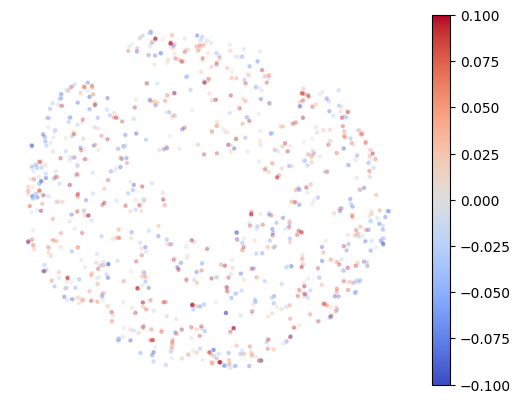

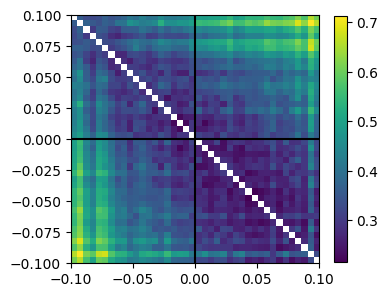

<Figure size 400x400 with 0 Axes>

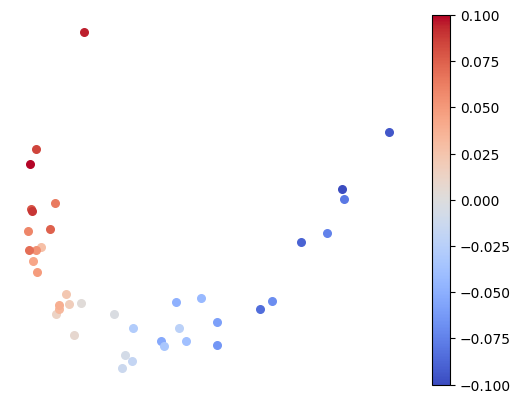

In [14]:
data = model.transform(data)
data = MARBLE.distribution_distances(data)
data = MARBLE.embed_in_2D(data)

plt.figure(figsize=(4, 4))
plotting.embedding(data, mus[data.y.numpy().astype(int)])

plt.figure(figsize=(4, 4))
im = plt.imshow(data.dist, extent=[mus[0], mus[-1], mus[0], mus[-1]])
plt.axhline(0, c='k')
plt.axvline(0, c='k')
plt.colorbar(im, shrink=0.8)

emb_MDS, _ = geometry.embed(data.dist, embed_typ='MDS')

plt.figure(figsize=(4, 4))
plotting.embedding(emb_MDS, mus, s=30, alpha=1)